In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from neuralprophet import NeuralProphet


In [3]:
museum = pd.read_csv("../../data/jumlah_pengunjung/od_15414_jumlah_pengunjung_museum_berdasarkan_kabupatenkota/data.jabarprov.go.id/disparbud-od_15414_jumlah_pengunjung_museum_berdasarkan_kabupatenkota_data.csv")
objek_wisata = pd.read_csv("../../data/jumlah_pengunjung/od_15367_jml_pengunjung_ke_objek_wisata__jenis_wisatawan/data.jabarprov.go.id/disparbud-od_15367_jml_pengunjung_ke_objek_wisata__jenis_wisatawan_data.csv")
tempat_rekreasi = pd.read_csv("../../data/jumlah_pengunjung/od_15420_jml_pengunjung_tempat_rekreasi__jenis_wisatawan/data.jabarprov.go.id/disparbud-od_15420_jml_pengunjung_tempat_rekreasi__jenis_wisatawan_data.csv")
bioskop = pd.read_csv("../../data/jumlah_pengunjung/od_17233_jumlah_pengunjung_bioskop_berdasarkan_kabupatenkota/data.jabarprov.go.id/disparbud-od_17233_jumlah_pengunjung_bioskop_berdasarkan_kabupatenkota_data.csv")
kemah = pd.read_csv("../../data/jumlah_pengunjung/od_perkemahan_berdasarkan_jumlah_pengunjung/data.jabarprov.go.id/disparbud-od_perkemahan_berdasarkan_jumlah_pengunjung_data.csv")
pondok_wisata = pd.read_csv("../../data/jumlah_pengunjung/od_pondok_wisata_berdasarkan_jumlah_pengunjung/data.jabarprov.go.id/disparbud-od_pondok_wisata_berdasarkan_jumlah_pengunjung_data.csv")


In [8]:
museum_g = museum.groupby("tahun")["jumlah_pengunjung"].sum().reset_index()
objek_wisata_g = objek_wisata.groupby("tahun")["jumlah_pengunjung"].sum().reset_index()
tempat_rekreasi_g = tempat_rekreasi.groupby("tahun")["jumlah_pengunjung"].sum().reset_index()
bioskop_g = bioskop.groupby("tahun")["jumlah_pengunjung"].sum().reset_index()
kemah_g = kemah.groupby("tahun")["jumlah_pengunjung"].sum().reset_index()
pondok_wisata_g = pondok_wisata.groupby("tahun")["jumlah_pengunjung"].sum().reset_index()

In [43]:
museum_g = museum_g.rename(columns={"tahun": "ds", "jumlah_pengunjung": "y"})
objek_wisata_g = objek_wisata_g.rename(columns={"tahun": "ds", "jumlah_pengunjung": "y"})
tempat_rekreasi_g = tempat_rekreasi_g.rename(columns={"tahun": "ds", "jumlah_pengunjung": "y"})
bioskop_g = bioskop_g.rename(columns={"tahun": "ds", "jumlah_pengunjung": "y"})
kemah_g = kemah_g.rename(columns={"tahun": "ds", "jumlah_pengunjung": "y"})
pondok_wisata_g = pondok_wisata_g.rename(columns={"tahun": "ds", "jumlah_pengunjung": "y"})

In [44]:
museum_model = Prophet()
museum_model.fit(museum_g)

objek_wisata_model = Prophet()
objek_wisata_model.fit(objek_wisata_g)

tempat_rekreasi_model = Prophet()
tempat_rekreasi_model.fit(tempat_rekreasi_g)

bioskop_model = Prophet()
bioskop_model.fit(bioskop_g)

kemah_model = Prophet()
kemah_model.fit(kemah_g)

pondok_wisata_model = Prophet()
pondok_wisata_model.fit(pondok_wisata_g)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
museum_future = pd.DataFrame({
    "ds": [max(museum_g["ds"]) + i for i in range(1, 6)]
})
museum_future["y"] = museum_model.predict(museum_future)["yhat"]
museum_gabung = pd.concat([museum_g, museum_future])
museum_gabung = museum_gabung.rename(columns={"ds": "tahun", "y": "jumlah_pengunjung"})
museum_gabung["jumlah_pengunjung"] = museum_gabung["jumlah_pengunjung"].astype(int)

objek_wisata_future = pd.DataFrame({
    "ds": [max(objek_wisata_g["ds"]) + i for i in range(1, 6)]
})
objek_wisata_future["y"] = objek_wisata_model.predict(objek_wisata_future)["yhat"]
objek_wisata_gabung = pd.concat([objek_wisata_g, objek_wisata_future])
objek_wisata_gabung = objek_wisata_gabung.rename(columns={"ds": "tahun", "y": "jumlah_pengunjung"})
objek_wisata_gabung["jumlah_pengunjung"] = objek_wisata_gabung["jumlah_pengunjung"].astype(int)

tempat_rekreasi_future = pd.DataFrame({
    "ds": [max(tempat_rekreasi_g["ds"]) + i for i in range(1, 6)]
})
tempat_rekreasi_future["y"] = tempat_rekreasi_model.predict(tempat_rekreasi_future)["yhat"]
tempat_rekreasi_gabung = pd.concat([tempat_rekreasi_g, tempat_rekreasi_future])
tempat_rekreasi_gabung = tempat_rekreasi_gabung.rename(columns={"ds": "tahun", "y": "jumlah_pengunjung"})
tempat_rekreasi_gabung["jumlah_pengunjung"] = tempat_rekreasi_gabung["jumlah_pengunjung"].astype(int)

bioskop_future = pd.DataFrame({
    "ds": [max(bioskop_g["ds"]) + i for i in range(1, 6)]
})
bioskop_future["y"] = bioskop_model.predict(bioskop_future)["yhat"]
bioskop_gabung = pd.concat([bioskop_g, bioskop_future])
bioskop_gabung = bioskop_gabung.rename(columns={"ds": "tahun", "y": "jumlah_pengunjung"})
bioskop_gabung["jumlah_pengunjung"] = bioskop_gabung["jumlah_pengunjung"].astype(int)

kemah_future = pd.DataFrame({
    "ds": [max(kemah_g["ds"]) + i for i in range(1, 6)]
})
kemah_future["y"] = kemah_model.predict(kemah_future)["yhat"]
kemah_gabung = pd.concat([kemah_g, kemah_future])
kemah_gabung = kemah_gabung.rename(columns={"ds": "tahun", "y": "jumlah_pengunjung"})
kemah_gabung["jumlah_pengunjung"] = kemah_gabung["jumlah_pengunjung"].astype(int)

pondok_wisata_future = pd.DataFrame({
    "ds": [max(pondok_wisata_g["ds"]) + i for i in range(1, 6)]
})
pondok_wisata_future["y"] = pondok_wisata_model.predict(pondok_wisata_future)["yhat"]
pondok_wisata_gabung = pd.concat([pondok_wisata_g, pondok_wisata_future])
pondok_wisata_gabung = pondok_wisata_gabung.rename(columns={"ds": "tahun", "y": "jumlah_pengunjung"})
pondok_wisata_gabung["jumlah_pengunjung"] = pondok_wisata_gabung["jumlah_pengunjung"].astype(int)

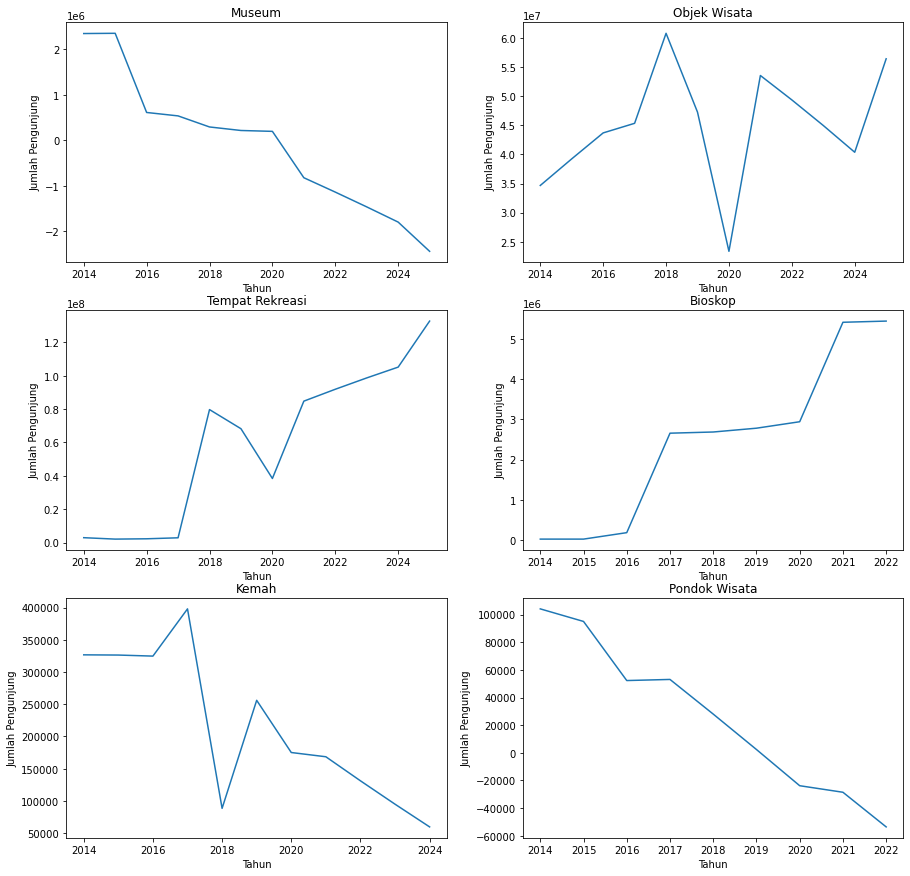

In [54]:
# subplot
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# museum
ax[0, 0].plot(museum_gabung["tahun"], museum_gabung["jumlah_pengunjung"])
ax[0, 0].set_title("Museum")
ax[0, 0].set_xlabel("Tahun")
ax[0, 0].set_ylabel("Jumlah Pengunjung")

# objek wisata
ax[0, 1].plot(objek_wisata_gabung["tahun"], objek_wisata_gabung["jumlah_pengunjung"])
ax[0, 1].set_title("Objek Wisata")
ax[0, 1].set_xlabel("Tahun")
ax[0, 1].set_ylabel("Jumlah Pengunjung")

# tempat rekreasi
ax[1, 0].plot(tempat_rekreasi_gabung["tahun"], tempat_rekreasi_gabung["jumlah_pengunjung"])
ax[1, 0].set_title("Tempat Rekreasi")
ax[1, 0].set_xlabel("Tahun")
ax[1, 0].set_ylabel("Jumlah Pengunjung")

# bioskop
ax[1, 1].plot(bioskop_gabung["tahun"], bioskop_gabung["jumlah_pengunjung"])
ax[1, 1].set_title("Bioskop")
ax[1, 1].set_xlabel("Tahun")
ax[1, 1].set_ylabel("Jumlah Pengunjung")

# kemah
ax[2, 0].plot(kemah_gabung["tahun"], kemah_gabung["jumlah_pengunjung"])
ax[2, 0].set_title("Kemah")
ax[2, 0].set_xlabel("Tahun")
ax[2, 0].set_ylabel("Jumlah Pengunjung")

# pondok wisata
ax[2, 1].plot(pondok_wisata_gabung["tahun"], pondok_wisata_gabung["jumlah_pengunjung"])
ax[2, 1].set_title("Pondok Wisata")
ax[2, 1].set_xlabel("Tahun")
ax[2, 1].set_ylabel("Jumlah Pengunjung")

plt.show()

In [55]:
museum_gabung.to_csv("../../data/generated/museum.csv", index=False)
objek_wisata_gabung.to_csv("../../data/generated/objek_wisata.csv", index=False)
tempat_rekreasi_gabung.to_csv("../../data/generated/tempat_rekreasi.csv", index=False)
bioskop_gabung.to_csv("../../data/generated/bioskop.csv", index=False)
kemah_gabung.to_csv("../../data/generated/kemah.csv", index=False)
pondok_wisata_gabung.to_csv("../../data/generated/pondok_wisata.csv", index=False)